In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:


def plot_stock_prediction(y_pred, y_test,stock_name, acciones_reales):
    """
    Evaluates the model on the test set and returns the predictions.
    """ 
    path='../data/raw/{stock_name}_with_SP500.csv'
    data_test_with_date = pd.read_csv(path.format(stock_name=stock_name))
    data_test_with_date = data_test_with_date[data_test_with_date['Date'] >= '2025-03-01']
    data_test_with_date = data_test_with_date[data_test_with_date['Date'] <= '2025-03-31']
    
    

    # Métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  
    print(f"MSE: {mse}")
    print(f"R2: {r2}")

    print(f"Predicciones positivas reales: {np.sum(y_test > 0)}")
    print(f"Predicciones positivas predichas: {np.sum(y_pred > 0)}")

    print(f"Predicciones negativas reales: {np.sum(y_test < 0)}")
    print(f"Predicciones negativas predichas: {np.sum(y_pred < 0)}")

    accuracy = np.sum((y_test > 0) & (y_pred > 0)) + np.sum((y_test < 0) & (y_pred < 0))
    accuracy = accuracy / len(y_test)
    print(f"Accuracy: {accuracy}")

    # Crear un DataFrame con fechas y valores reales y predichos
    result_df = pd.DataFrame({
        'Date': data_test_with_date['Date'].values[:len(y_test)],
        'Real': y_test.values,
        'Predicción': y_pred
    })

    # Convertir la columna de fecha a datetime
    result_df['Date'] = pd.to_datetime(result_df['Date'])

    # Graficar los valores reales y predichos a lo largo del tiempo
    plt.figure(figsize=(12, 6))
    plt.plot(result_df['Date'], result_df['Real'], label='Valores Reales', marker='o')
    plt.plot(result_df['Date'], result_df['Predicción'], label='Valores Predichos', marker='x')
    plt.xlabel('Fecha')
    plt.ylabel('Cambio Ratio')
    plt.title(f'Predicción vs Valores Reales de change ratio de {stock_name} - Marzo 2025')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #Como la predicción es diaria se puede sumar al valor 
    #real de cada dia el porcentaje de cambio predicho para ver como se comporta la acción en el tiempo. Con la finalidad
    #de reduccir los errores acumulados que daría una predicción de corrido en todo el mes.

    acciones_predichas =[acciones_reales[0]]
    for i in range(len(acciones_reales)-1):
        acciones_predichas.append(acciones_reales[i]*(1+y_pred[i]/100))
        # acciones_predichas.append(acciones_predichas[i]*(1+y_pred[i]/100))
        # print("Acciones reales anterior dia: ", acciones_reales[i])
        # print("Acciones predichas anterior dia: ", acciones_predichas[i])
        # print(y_pred[i])
        # print(y_test[i])
        # print("Predicción: ", acciones_predichas[i]*(1+y_pred[i]/100))
        # print('----------------')
    data_test_with_date2 = pd.read_csv(path.format(stock_name=stock_name))
    data_test_with_date2 = data_test_with_date2[data_test_with_date2['Date'] >= '2025-02-28']   
    
    #Gráfica de la acción con el porcentaje de cambio. 
    plt.figure(figsize=(12, 6))
    plt.plot(data_test_with_date2['Date'], acciones_reales, label='Valores Reales', marker='o')
    plt.plot(data_test_with_date2['Date'], acciones_predichas, label='Valores Predichos', marker='x')
    # plt.plot(data_test_with_date['Date'], acciones_predichas, label='Valores Predichos', marker='x')
    plt.xlabel('Fecha')
    plt.ylabel('Valor de la acción')
    plt.title(f'Predicción vs Valores Reales en acción de {stock_name} - Marzo 2025')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [3]:

#Cargar los datos de entrenamiento y splitearlos. Solamente se realiza este proceso para poder realizar el escalado ya que no se guardó la clase Scaler.
AAPL_train_val = pd.read_csv("../data/processed/AAPL_train.csv")
AMZN_train_val = pd.read_csv("../data/processed/AMZN_train.csv")
GOOGL_train_val = pd.read_csv("../data/processed/GOOGL_train.csv")
MSFT_train_val = pd.read_csv("../data/processed/MSFT_train.csv")
NVDA_train_val = pd.read_csv("../data/processed/NVDA_train.csv")
scaler_APPL = StandardScaler()
AAPL_train, AAPL_val  = train_test_split(AAPL_train_val, test_size=0.15, random_state=42, shuffle=True) 
AAPL_X_train = AAPL_train.drop(columns=['ChangeRatio'])
AAPL_X_train = scaler_APPL.fit_transform(AAPL_X_train)

scaler_AMZN = StandardScaler()
AMZN_train, AMZN_val  = train_test_split(AMZN_train_val, test_size=0.15, random_state=42, shuffle=True)
AMZN_X_train = AMZN_train.drop(columns=['ChangeRatio'])
AMZN_X_train = scaler_AMZN.fit_transform(AMZN_X_train)

scaler_GOOGL = StandardScaler()
GOOGL_train, GOOGL_val  = train_test_split(GOOGL_train_val, test_size=0.15, random_state=42, shuffle=True)
GOOGL_X_train = GOOGL_train.drop(columns=['ChangeRatio'])
GOOGL_X_train = scaler_GOOGL.fit_transform(GOOGL_X_train)

scaler_MSFT = StandardScaler()
MSFT_train, MSFT_val  = train_test_split(MSFT_train_val, test_size=0.15, random_state=42, shuffle=True)
MSFT_X_train = MSFT_train.drop(columns=['ChangeRatio'])
MSFT_X_train = scaler_MSFT.fit_transform(MSFT_X_train)

scaler_NVDA = StandardScaler()
NVDA_train, NVDA_val  = train_test_split(NVDA_train_val, test_size=0.15, random_state=42, shuffle=True)
NVDA_X_train = NVDA_train.drop(columns=['ChangeRatio'])
NVDA_X_train = scaler_NVDA.fit_transform(NVDA_X_train)

#Cargar los modelos para cada acción del modelo de prediccion y su respectivo modelo de PCA
nvidia_model=joblib.load('../models/saved_models/NVDA_best_model.pkl')
apple_model=joblib.load('../models/saved_models/AAPL_best_model.pkl')
amazon_model=joblib.load('../models/saved_models/AMZN_best_model.pkl')
google_model=joblib.load('../models/saved_models/GOOGL_best_model.pkl')
msft_model=joblib.load('../models/saved_models/MSFT_best_model.pkl')

nvidia_pca=joblib.load('../models/saved_models/NVDA_pca.pkl')
apple_pca=joblib.load('../models/saved_models/AAPL_pca.pkl')
amazon_pca=joblib.load('../models/saved_models/AMZN_pca.pkl')
google_pca=joblib.load('../models/saved_models/GOOGL_pca.pkl')
msft_pca=joblib.load('../models/saved_models/MSFT_pca.pkl')

In [4]:
#Cargar la data de marzo del 2025 para cada acción. 
#Ya en la práctica se tendría unicamente las features del día actual, por lo que se 
#haría una predicción cada día para cada acción y el feature engineering de la data de las acciones necesario para lograr esto. 
#Para el caso, se cargan todos los datos de una 
#sola vez para hacer la predicción de cada acción.
nvidia_test=pd.read_csv('../data/processed/NVDA_test.csv')
apple_test=pd.read_csv('../data/processed/AAPL_test.csv')
amazon_test=pd.read_csv('../data/processed/AMZN_test.csv')
google_test=pd.read_csv('../data/processed/GOOGL_test.csv')
msft_test=pd.read_csv('../data/processed/MSFT_test.csv')

#Cargar los valores reales de las acciones a lo largo del mes de marzo del 2025 para cada acción. 
#Serían los valores de 'Close_lag_1' de cada acción.
nvidia=pd.read_csv('../data/raw/NVDA_with_SP500.csv')
apple=pd.read_csv('../data/raw/AAPL_with_SP500.csv')
amazon=pd.read_csv('../data/raw/AMZN_with_SP500.csv')
google=pd.read_csv('../data/raw/GOOGL_with_SP500.csv')
msft=pd.read_csv('../data/raw/MSFT_with_SP500.csv')

nvidia_reales=nvidia['Close'].values[nvidia['Date'] >= '2025-02-28']
apple_reales=apple['Close'].values[apple['Date'] >= '2025-02-28']
amazon_reales=amazon['Close'].values[amazon['Date'] >= '2025-02-28']
google_reales=google['Close'].values[google['Date'] >= '2025-02-28']
msft_reales=msft['Close'].values[msft['Date'] >= '2025-02-28']

In [5]:
#Finalmente se escalan los datos. Se utiliza el modelo de PCA de cada acción para transformar los datos de cada acción.
#
nvidia_test_y= nvidia_test['ChangeRatio']
print(nvidia_test_y)
nvidia_test_X= nvidia_test.drop(columns=['ChangeRatio'])
nvidia_test_X= scaler_NVDA.transform(nvidia_test_X)
nvidia_test_X= nvidia_pca.transform(nvidia_test_X)

apple_test_y= apple_test['ChangeRatio']
apple_test_X= apple_test.drop(columns=['ChangeRatio'])
apple_test_X= scaler_APPL.transform(apple_test_X)
apple_test_X= apple_pca.transform(apple_test_X)


amazon_test_y= amazon_test['ChangeRatio']
amazon_test_X= amazon_test.drop(columns=['ChangeRatio'])
amazon_test_X= scaler_AMZN.transform(amazon_test_X)
amazon_test_X= amazon_pca.transform(amazon_test_X)


google_test_y= google_test['ChangeRatio']
google_test_X= google_test.drop(columns=['ChangeRatio'])
google_test_X= scaler_GOOGL.transform(google_test_X)
google_test_X= google_pca.transform(google_test_X)


msft_test_y= msft_test['ChangeRatio']
msft_test_X= msft_test.drop(columns=['ChangeRatio'])
msft_test_X= scaler_MSFT.transform(msft_test_X)
msft_test_X= msft_pca.transform(msft_test_X)


0      4.651759
1    -10.412111
2      6.262990
3     -3.444467
4     -2.008275
5     -1.213487
6     -2.647862
7      6.673989
8      2.549944
9      1.350083
10     3.481997
11    -3.861820
12    -0.618647
13    -0.613962
14     0.334620
15     2.514105
16     0.558897
17    -1.509747
18    -6.215788
19     0.125729
20    -5.704548
Name: ChangeRatio, dtype: float64


In [6]:
# #Generar las predicciones de cada accion para el mes de marzo del 2025
nvidia_pred=nvidia_model.predict(nvidia_test_X)
print(nvidia_pred)
apple_pred=apple_model.predict(apple_test_X)
print(apple_pred)
amazon_pred=amazon_model.predict(amazon_test_X)
google_pred=google_model.predict(google_test_X)
msft_pred=msft_model.predict(msft_test_X)

#Convertir a series para poder graficar
nvidia_pred=pd.Series(nvidia_pred)
apple_pred=pd.Series(apple_pred)
amazon_pred=pd.Series(amazon_pred)
google_pred=pd.Series(google_pred)
msft_pred=pd.Series(msft_pred)


[ 0.721223   -0.380957    0.5015198   0.39760655  0.62474084 -0.6377849
 -0.45142516 -0.17519447  0.2041157   0.4575276   0.43327183  1.1498028
  1.0515926   0.4401325   0.4401325   1.3065381   0.9770606   0.9770606
 -2.162459   -1.405036    0.8375745 ]
[ 0.05185953  0.06732665 -0.01398386 -0.02409424 -0.03956043 -0.12930079
 -0.04770741  0.32617565  1.08724145  0.7516514   2.30525339  1.91320265
  1.79518307  1.1789736   1.14059859  1.41421236  0.3801047   0.38781092
  0.57063746  0.34817267  0.23356276]


MSE: 4.099896205350883
R2: -0.23144756916757325
Predicciones positivas reales: 9
Predicciones positivas predichas: 16
Predicciones negativas reales: 12
Predicciones negativas predichas: 5
Accuracy: 0.47619047619047616


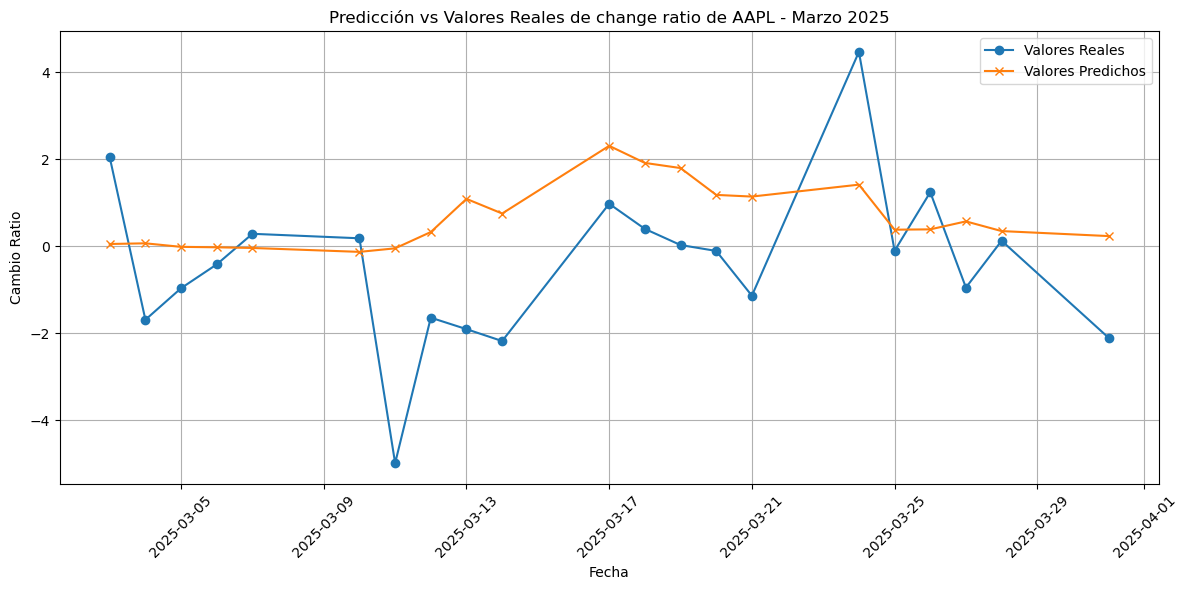

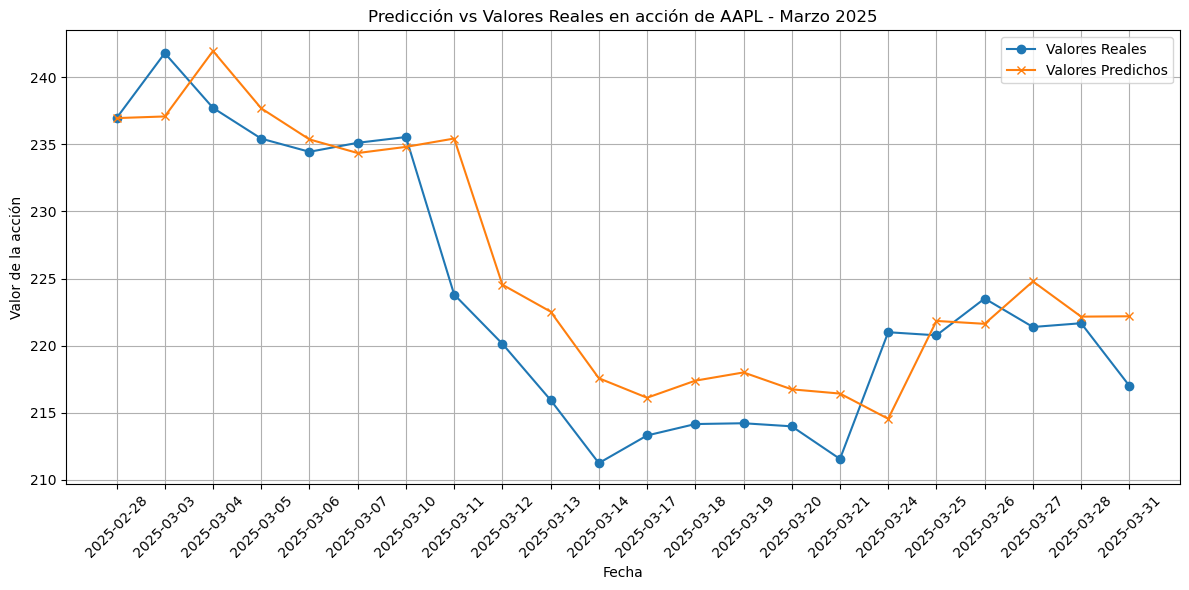

MSE: 6.650865786143377
R2: -0.06106159883219453
Predicciones positivas reales: 8
Predicciones positivas predichas: 17
Predicciones negativas reales: 13
Predicciones negativas predichas: 4
Accuracy: 0.2857142857142857


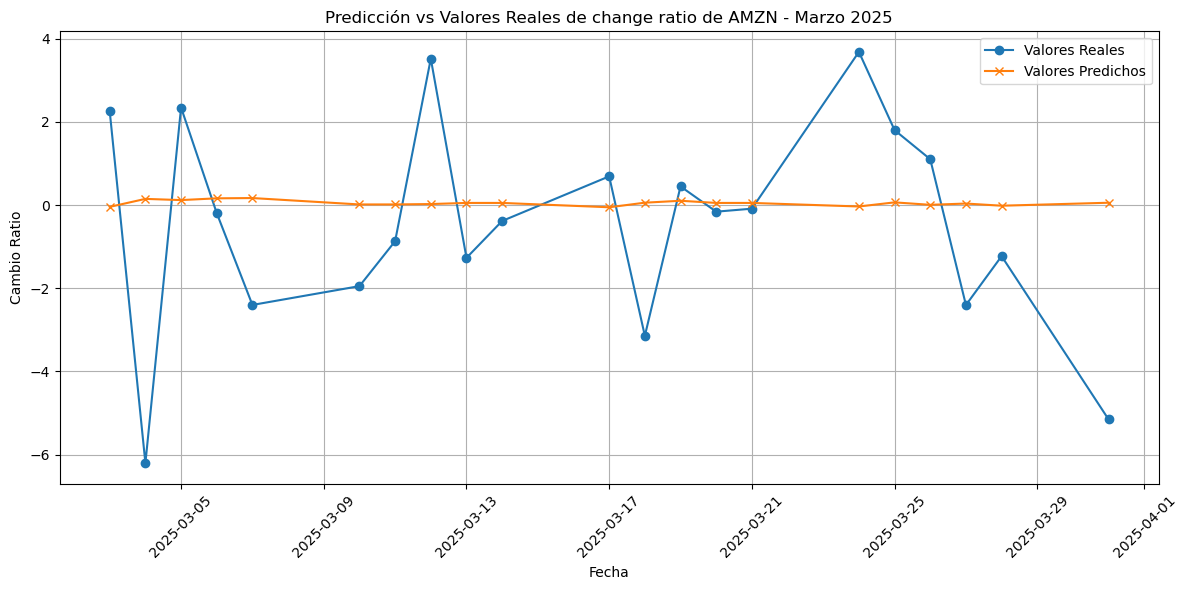

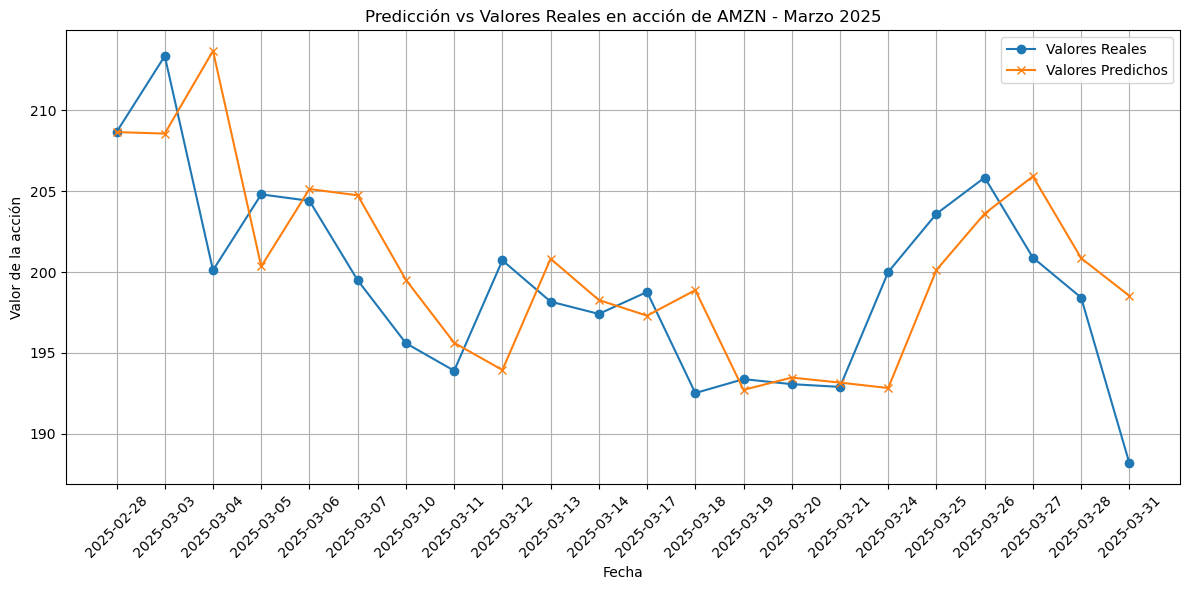

MSE: 3.9316668176853953
R2: -0.032024655800445556
Predicciones positivas reales: 9
Predicciones positivas predichas: 19
Predicciones negativas reales: 12
Predicciones negativas predichas: 2
Accuracy: 0.42857142857142855


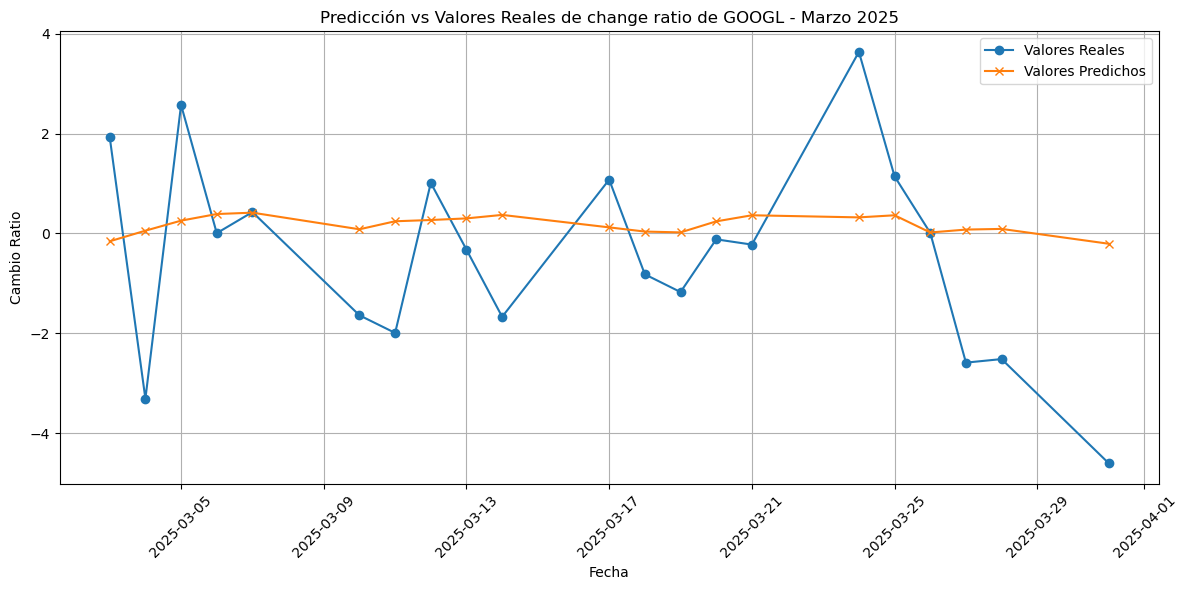

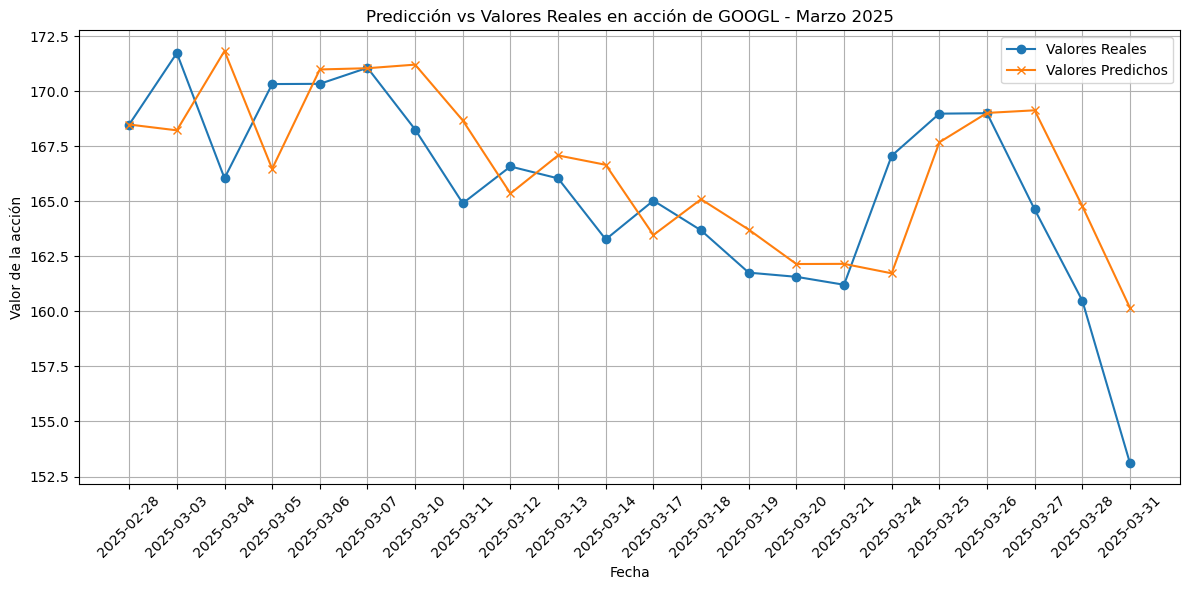

MSE: 2.8976237144816297
R2: -0.00905068786254315
Predicciones positivas reales: 10
Predicciones positivas predichas: 8
Predicciones negativas reales: 11
Predicciones negativas predichas: 13
Accuracy: 0.6190476190476191


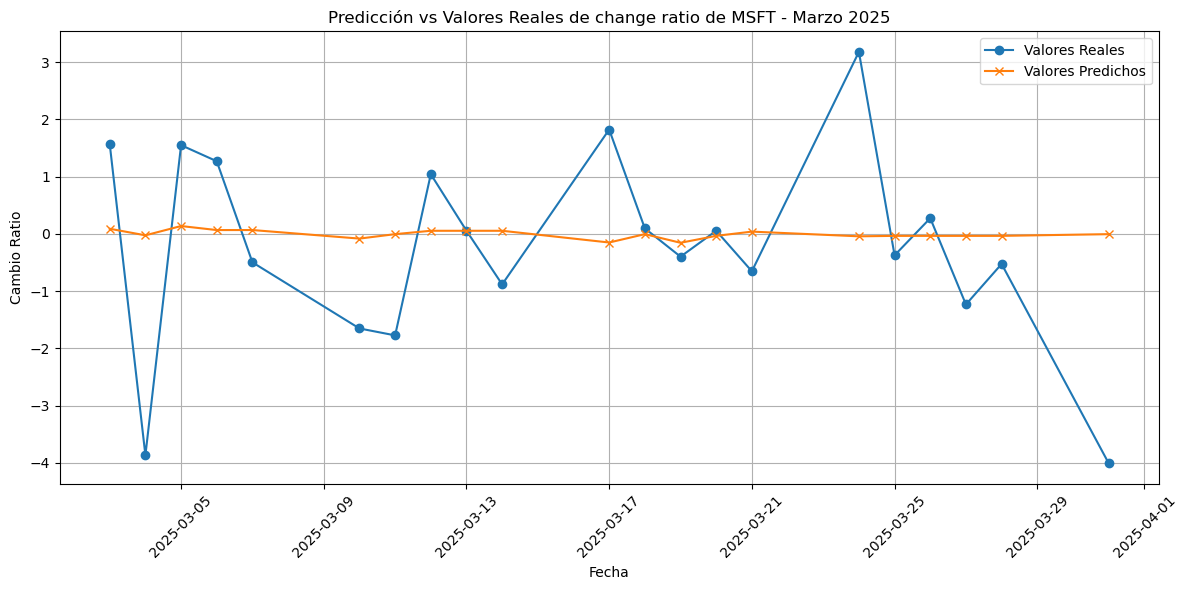

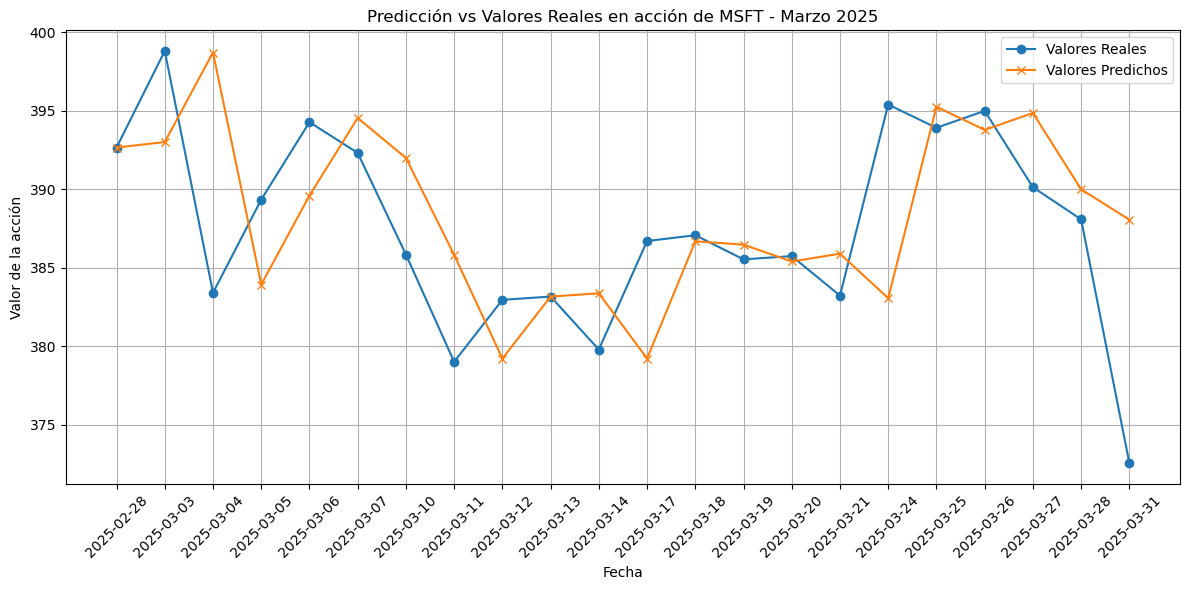

MSE: 16.04957487832116
R2: 0.0370705631928302
Predicciones positivas reales: 10
Predicciones positivas predichas: 15
Predicciones negativas reales: 11
Predicciones negativas predichas: 6
Accuracy: 0.5714285714285714


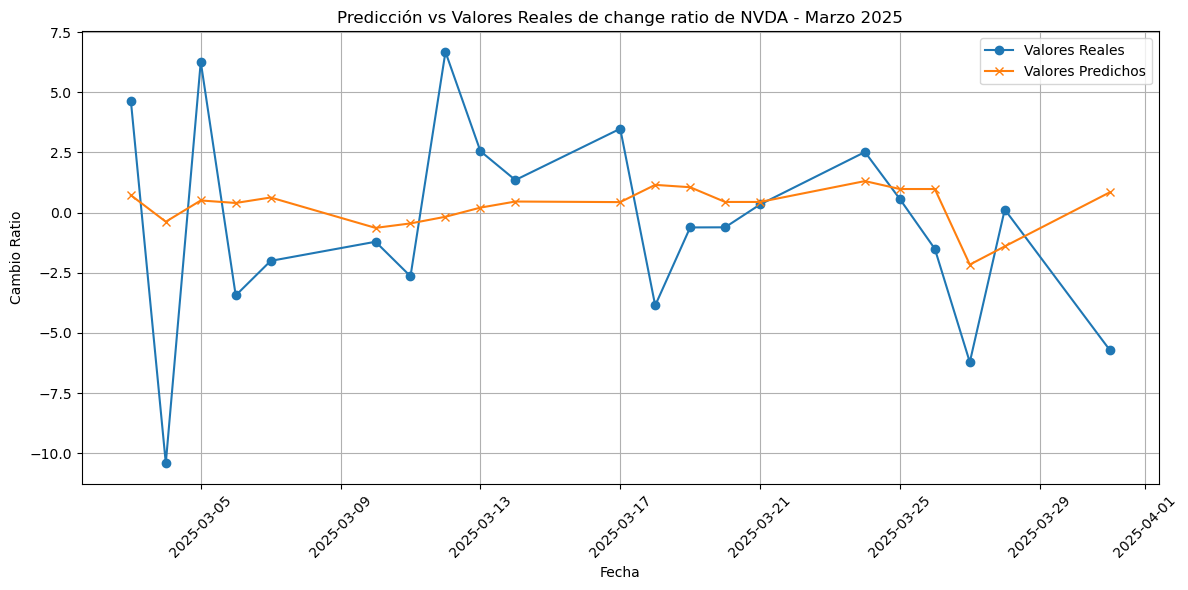

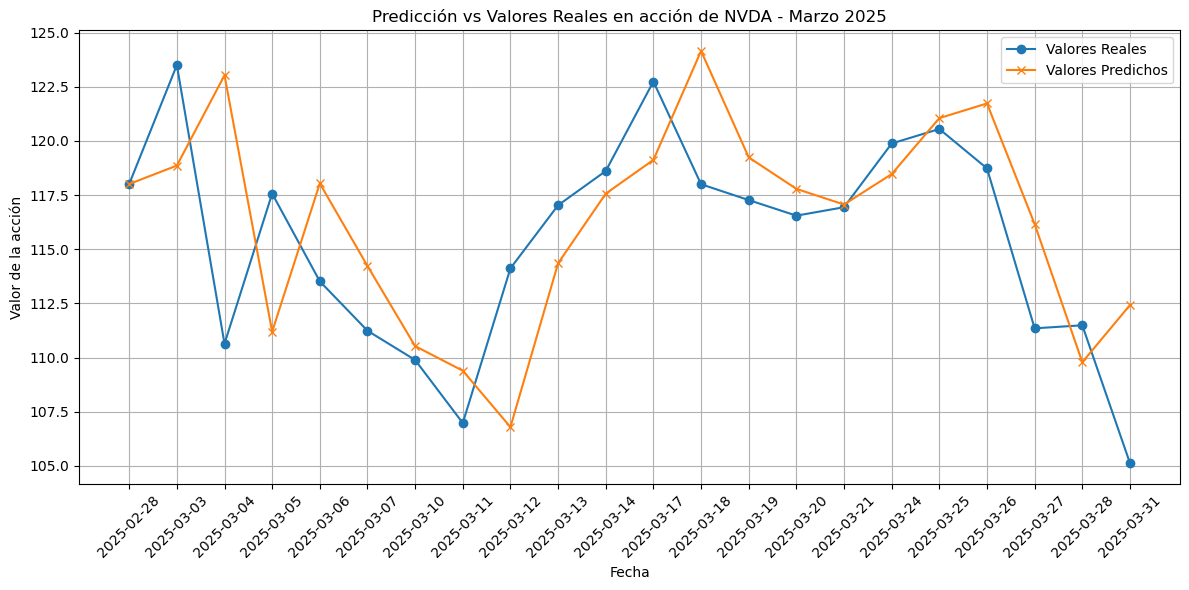

In [7]:
#Acción de Apple
plot_stock_prediction(apple_pred, apple_test_y, 'AAPL', apple_reales)
#Acción de Amazon
plot_stock_prediction(amazon_pred, amazon_test_y, 'AMZN', amazon_reales)
#Acción de Google
plot_stock_prediction(google_pred, google_test_y, 'GOOGL', google_reales)
#Acción de Microsoft
plot_stock_prediction(msft_pred, msft_test_y, 'MSFT', msft_reales)
#Acción de Nvidia
plot_stock_prediction(nvidia_pred, nvidia_test_y, 'NVDA', nvidia_reales)

In [8]:
# import random
# import numpy as np

# #Lógica de inversiones, se plantea una inversión al inicio de cada día durante el mes de marzo.
# #La inversión o retiro de cada día dependerá de la predicción del modelo referente a la tendencia de la ETF al final de ese día.

# #Se inicia el proceso un día antes del primer día de marzo (fehca de inicio de la inversión).
# #Se busca el estado actual de cada ETF para el 31 de marzo, una vez cerrada la bolsa.

# #Se inicializan 31 valores para cada ETF, que representan el valor de cada ETF al final de cada día o al inicio del siguiente día.
# #Para esta simulación representarían los valores de ETF al inicio de cada día del mes de marzo.

# cambiosPorcentuales=[[random.uniform(-0.05, 0.05) for _ in range(31)] for _ in range(5)]
# #Gráfica de valores de cada ETF a lo largo del mes de marzo.
# import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[0][i] for i in range(31)], label='ETF 1')
# plt.title('Cambios porcentuales del ETF 1 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[1][i] for i in range(31)], label='ETF 2')
# plt.title('Cambios porcentuales del ETF 2 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[2][i] for i in range(31)], label='ETF 3')
# plt.title('Cambios porcentuales del ETF 3 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[3][i] for i in range(31)], label='ETF 4')
# plt.title('Cambios porcentuales del ETF 4 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[4][i] for i in range(31)], label='ETF 5')
# plt.title('Cambios porcentuales del ETF 5 a lo largo del mes de marzo')



In [9]:
#Funciones para calcular ganancias por medio de tranformaciones de dinero a acciones y viceversa.
def money_to_action(money, actual_action_value):
    """
    Función que convierte el dinero a acciones.
    :param money: dinero a convertir
    :param actual_action_value: valor de la acción en ese momento
    :return: número de acciones redondeado a 4 decimales
    """
    try:
        valor=round(money / actual_action_value, 4)
        return valor
    except ZeroDivisionError:
        return 0


def action_to_money(actions, actual_action_value):
    """
    Función que convierte las acciones a dinero.
    :param actions: número de acciones
    :param actual_action_value: valor de la acción en ese momento
    :return: dinero redondeado a 2 decimales
    """
    return round(actions * actual_action_value, 2)


In [10]:
# #Se inicia el proceso de inversión, sabiendo el cambio porcentual de cada ETF respecto al día anterior (la y que actualmente se predice
# # en el modelo).
# #Si el ETF presentó una disminución en su valor se retira una inversión equivalente al total de cartera sobre 1,5 veces el porcentaje 
# # del cambio porcentual.
# #actual invertido en la ETF. Si actualmente no se tiene acciones de la ETF, se inverte un 10% del total de la cartera en caso 
# #de que el cambio porcentual sea practicamente nulo y un 1% del total de la cartera en caso de que el cambio porcentual sea menor que el -100%.

# #Si el ETF presentó un aumento en su valor se invierte una cantidad equivalente 
# # al porcentaje del cambio porcentual respecto al total actual en la cartera.
# #Si actualmente no se tiene acciones en la ETF, se invierte un capital equivalente a 2 veces el 
# # porcentaje del cambio porcentual respecto al total actual en la cartera.
# #Si se predice un aumento de acciones del ETF sobrepasa el umbral del 40% (cambio porcentual), se invierte el capital equivalente a 2 veces 
# # el porcentaje del cambio porcentual respecto al total actual en la cartera y se marca la ETF para el retiro del 75% de acciones al 
# #del día siguiente. Si se predice este aumento y también se tenía previsto el retiro de acciones, en su lugar se 
# #retira un 20% de acciones de la ETF, se deposita el capital equivalente al porcentaje del cambio porcentual respecto al total
# #actual en la cartera y se marca la ETF para el retiro del 75% de acciones al inicio del día siguiente.

# #Las inversiones que dependen del cambio porcentual tienen un máximo del 20% del total de la cartera actual para cuando el cambio porcentual es  positivo y
# #un máximo del 5% del total de la cartera actual para cuando el cambio porcentual es negativo.
# #Los retiros de acciones que estan bajando tiene un máximo del 90% del la acción actual en la ETF.

# #El orden es importante, primero se retiran acciones de las ETF marcadas para el retiro, luego se 
# #retiran acciones de las ETF que presentaron una disminución en su valor, luego se invierte
# #en las ETF de mayor umbral y aquellas que presentaron un aumento en su valor.
# #Y finalmente se invierte en las ETF cuyo valor disminuyó, pero esta inversión es pequeña.
# def dia_bolsa(acciones_actuales, ETF_actual, cambio_porcentual, cartera_actual, retirar_acciones, umbral=0.4):
#     print(ETF_actual)
   
#     #Primero se retira el 50% de acciones de las ETF marcadas para el retiro y cuyo cambio_porcentual es menor que 0.2 (umbral para inversión masiva)
#     for i in range(len(ETF_actual)):
#         if retirar_acciones[i] and cambio_porcentual[i]<=umbral and acciones_actuales[i]>0:
#             valor=action_to_money(acciones_actuales[i]*0.6, ETF_actual[i])
#             acciones_actuales[i]-=acciones_actuales[i]*0.6
#             cartera_actual+=valor
#             print("Retiro del 75% de acciones de la ETF", i+1)
#             print("Acciones actuales después del retiro:", acciones_actuales[i])
#             print("Cartera actual después del retiro:", cartera_actual)
#             retirar_acciones[i]=False
            
#     #Retiro de ETF con umbral que sigue siendo alto
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>umbral:
#                 if retirar_acciones[i]:
#                     #Retiro del 20% de acciones de la ETF
#                     valor=action_to_money(acciones_actuales[i]*0.2, ETF_actual[i])
#                     acciones_actuales[i]-=acciones_actuales[i]*0.2
#                     cartera_actual+=valor
#                     print("Retiro del 20% de acciones de la ETF de umbral alto", i+1)
#                     print("Cartera actual después del retiro:", cartera_actual)

#     #Se realiza un retiro de inversiones de las ETF que presentaron una disminución en su valor
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]<0:
#             if acciones_actuales[i]>0:
#                 valor=action_to_money(min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i], ETF_actual[i])
#                 acciones_actuales[i]-=min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i]
#                 cartera_actual+=valor
#                 print("Retiro de acciones de la ETF", i+1)
#                 print("Cartera actual después del retiro:", cartera_actual)

#     #Inversión en las ETF de mayor umbral 
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>umbral:
#                 if retirar_acciones[i]:
#                     #Inversión del capital equivalente al porcentaje del cambio porcentual respecto al total actual en la cartera
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     retirar_acciones[i]=True
#                     print("Inversión en la ETF de mayor umbral", i+1)
#                     print("Cartera actual después de inversión:", cartera_actual)
#                 else:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2), ETF_actual[i]
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con umbral alto", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                     retirar_acciones[i]=True

#     #Inversion en las ETF de menor umbral y que presentaron un aumento en su valor.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>0:
#             if cambio_porcentual[i]<=umbral:
#                 if acciones_actuales[i]>0:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con valor positivo", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                 else:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con valor positivo", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                     print("Acciones actuales después de la inversión:", acciones_actuales[i])
                    
#     #Inversión del 5% en las ETF cuyo valor no cambió y no se tiene acciones. Y del 3% si se tiene acciones.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]==0:
#             if acciones_actuales[i]<=0:
#                 valor=cartera_actual*0.05   
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor nulo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
#             else:
#                 valor=cartera_actual*0.03
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor nulo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
    
#     #Inversión en las ETF cuyo valor disminuyó, pero esta inversión es pequeña. Solo se inverte si no se tiene acciones de la ETF.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]<0:
#             if acciones_actuales[i]<=0:
#                 valor=cartera_actual*(0.1*abs(cambio_porcentual[i]))
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor negativo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
                
    
#     print("Acciones actuales al final del día:", acciones_actuales)
#     print("Cartera actual al final del día:", cartera_actual)
#     return cartera_actual, [ETF_actual[i]*(1+cambio_porcentual[i]) for i in range(len(ETF_actual))]


In [11]:
def dia_accion(acciones, precio, cambio, cartera, retirar, umbral=0.4, factor=500):
    """
    Simula un día de trading basado en predicciones de cambio porcentual.
    """
    
    def invertir(monto):
        nonlocal cartera, acciones
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto

    def vender(porcentaje):
        nonlocal cartera, acciones
        venta = acciones * porcentaje
        venta = min(venta, acciones)  # Protección
        cartera += action_to_money(venta, precio)
        acciones -= venta

    # --------------------------
    # Lógica principal (prioridades)
    # --------------------------

    if acciones > 0:
        # 1) Retiro masivo si marcado y sin gran subida
        if retirar and cambio <= umbral:
            vender(0.6)
            retirar = False

        # 2) Retiro parcial si marcado y sube fuerte
        elif retirar and cambio > umbral:
            vender(0.2)

        # 3) Venta por caída
        elif cambio < 0:
            porcentaje = min(0.9, 1.5 * abs(cambio * factor))
            vender(porcentaje)

        # 4) Compra agresiva si sube más que el umbral
        elif cambio > umbral:
            coef = 1 if retirar else 2
            monto = min(abs(cambio * coef * 5) * cartera, cartera * 0.2)
            invertir(monto)
            retirar = True

        # 5) Compra moderada si sube ligeramente
        elif 0 < cambio <= umbral:
            coef = 2 if acciones == 0 else 1
            monto = min(abs(cambio * coef) * cartera, cartera * 0.2)
            invertir(monto)

        # 6) Sin cambio en el mercado
        elif cambio == 0:
            pct = 0.05 if acciones == 0 else 0.03
            invertir(cartera * pct)

    else:
        # 7) No tienes acciones pero el mercado sube o se mantiene
        if cambio >= 0:
            invertir(cartera * 0.3)

        # 8) No tienes acciones y hay caída (apuesta contraria)
        else:
            monto = cartera * min(0.2, 0.1 * abs(cambio * factor))
            invertir(monto)

    # --------------------------
    # Actualizamos precio final
    # --------------------------
    precio = round(precio * (1 + cambio), 2)

    # Protección extra contra negativos
    acciones = max(acciones, 0)
    cartera = max(cartera, 0)

    return cartera, acciones, retirar


In [12]:
#Se realiza la logica de inversion. Acciones reales son los valores de opening de cada día, acciones predichas son los valores de closing de cada día.
def mes_accion(acciones, cartera_mensual,acciones_reales, y_pred,retirar=False, umbral=0.02):
    cartera=cartera_mensual
    for i in range(len(acciones_reales)-1):
        precio_real=acciones_reales[i+1]    
        precio_actual=acciones_reales[i]
        cambio_predicho=y_pred[i]/100

        cartera, acciones, retirar = dia_accion(acciones, precio_actual, cambio_predicho, cartera, retirar, umbral)

        cambio_real = ((precio_real - precio_actual) / precio_actual)
        print(f"Dia {i+1}:")
        print(f"Close día anterior: {precio_actual}")
        print(f"Close día actual: {precio_real}")
        print(f"Cambio predicho: {cambio_predicho}")
        print(f"Cambio real: {cambio_real}")
        print(f"Acciones: {acciones}")
        print(f"Valor acciones en dolares: {action_to_money(acciones, precio_actual)}")
        print(f"Efectivo disponible: {cartera}")
        print(f"Total capital: {cartera + action_to_money(acciones, precio_actual)}")
        print(f"Retirar: {retirar}")
        print("\n")
    #El ultimo día se venden todas las acciones y se suma el dinero a la cartera.
    precio_actual=acciones_reales[-1]
    cartera+=action_to_money(acciones, precio_actual)
    acciones=0
    print(f"Último día:")
    print(f"Close día anterior: {precio_actual}")
    print(f"Acciones: {acciones}")
    print(f"Valor acciones en dolares: {action_to_money(acciones, precio_actual)}")
    print(f"Efectivo disponible: {cartera}")
    print(f"Total capital: {cartera + action_to_money(acciones, precio_actual)}")
    print(f"Ganancia total: {cartera-cartera_mensual}")
    return cartera

In [13]:
#Carga de los opening de cada día para cada acción en marzo del 2025.
nvidia_open=pd.read_csv('../data/raw/NVDA_with_SP500.csv')
apple_open=pd.read_csv('../data/raw/AAPL_with_SP500.csv')
amazon_open=pd.read_csv('../data/raw/AMZN_with_SP500.csv')
google_open=pd.read_csv('../data/raw/GOOGL_with_SP500.csv')
msft_open=pd.read_csv('../data/raw/MSFT_with_SP500.csv')

#Se cargan los valores de apertura de cada acción para el mes de marzo del 2025.
nvidia_open=nvidia_open['Open'].values[nvidia_open['Date'] >= '2025-03-01']
apple_open=apple_open['Open'].values[apple_open['Date'] >= '2025-03-01']
amazon_open=amazon_open['Open'].values[amazon_open['Date'] >= '2025-03-01']
google_open=google_open['Open'].values[google_open['Date'] >= '2025-03-01']
msft_open=msft_open['Open'].values[msft_open['Date'] >= '2025-03-01']

In [14]:
#Se dan 200 dolares a cada acción para invertir en cada una de ellas.
#Inversión en acciones de Apple
apple_money=mes_accion(0, 200, apple_open, apple_pred, retirar=False)

Dia 1:
Close día anterior: 238.02999877929688
Close día actual: 235.92999267578125
Cambio predicho: 0.0005185953078288637
Cambio real: -0.008822443029387929
Acciones: 0.2521
Valor acciones en dolares: 60.01
Efectivo disponible: 140.0
Total capital: 200.01
Retirar: False


Dia 2:
Close día anterior: 235.92999267578125
Close día actual: 235.7400054931641
Cambio predicho: 0.0006732665334125035
Cambio real: -0.0008052693108766484
Acciones: 0.2525
Valor acciones en dolares: 59.57
Efectivo disponible: 139.90574268532225
Total capital: 199.47574268532225
Retirar: False


Dia 3:
Close día anterior: 235.7400054931641
Close día actual: 235.3300018310547
Cambio predicho: -0.0001398386190064734
Cambio real: -0.0017392197020258938
Acciones: 0.2260180615256491
Valor acciones en dolares: 53.28
Efectivo disponible: 146.14574268532226
Total capital: 199.42574268532226
Retirar: False


Dia 4:
Close día anterior: 235.3300018310547
Close día actual: 239.07000732421875
Cambio predicho: -0.00024094236100812

In [15]:
#Inversión en acciones de Amazon
amazon_money=mes_accion(0, 200, amazon_open, amazon_pred, retirar=False)

Dia 1:
Close día anterior: 205.0200042724609
Close día actual: 203.8000030517578
Cambio predicho: -0.00044843949909794496
Cambio real: -0.005950644792113937
Acciones: 0.0219
Valor acciones en dolares: 4.49
Efectivo disponible: 195.51560500902056
Total capital: 200.00560500902057
Retirar: False


Dia 2:
Close día anterior: 203.8000030517578
Close día actual: 208.3600006103516
Cambio predicho: 0.0014718408310857428
Cambio real: 0.022374865016246855
Acciones: 0.023299999999999998
Valor acciones en dolares: 4.75
Efectivo disponible: 195.22783715845387
Total capital: 199.97783715845387
Retirar: False


Dia 3:
Close día anterior: 208.3600006103516
Close día actual: 200.6999969482422
Cambio predicho: 0.0011827627424992103
Cambio real: -0.036763311766514005
Acciones: 0.024399999999999998
Valor acciones en dolares: 5.08
Efectivo disponible: 194.99692894636414
Total capital: 200.07692894636415
Retirar: False


Dia 4:
Close día anterior: 200.6999969482422
Close día actual: 199.25
Cambio predicho:

In [16]:
#Inversión en acciones de Google
google_money=mes_accion(0, 200, google_open, google_pred, retirar=False)


Dia 1:
Close día anterior: 166.81787109375
Close día actual: 170.72337341308594
Cambio predicho: -0.001564970998513164
Cambio real: 0.023411774132647237
Acciones: 0.0938
Valor acciones en dolares: 15.65
Efectivo disponible: 184.35029001486836
Total capital: 200.00029001486837
Retirar: False


Dia 2:
Close día anterior: 170.72337341308594
Close día actual: 172.8209686279297
Cambio predicho: 0.0005564035407125827
Cambio real: 0.012286514569791001
Acciones: 0.0944
Valor acciones en dolares: 16.12
Efectivo disponible: 184.2477168607727
Total capital: 200.3677168607727
Retirar: False


Dia 3:
Close día anterior: 172.8209686279297
Close día actual: 172.1517333984375
Cambio predicho: 0.0025662460645879148
Cambio real: -0.0038724191561094632
Acciones: 0.09709999999999999
Valor acciones en dolares: 16.78
Efectivo disponible: 183.77489188246943
Total capital: 200.55489188246943
Retirar: False


Dia 4:
Close día anterior: 172.1517333984375
Close día actual: 173.66000366210938
Cambio predicho: 0.0

In [17]:
#Inversión en acciones de Microsoft
msft_money=mes_accion(0, 200, msft_open, msft_pred, retirar=False)

Dia 1:
Close día anterior: 388.489990234375
Close día actual: 388.6099853515625
Cambio predicho: 0.000894987994102934
Cambio real: 0.0003088756987409309
Acciones: 0.1544
Valor acciones en dolares: 59.98
Efectivo disponible: 140.0
Total capital: 199.98
Retirar: False


Dia 2:
Close día anterior: 388.6099853515625
Close día actual: 401.0199890136719
Cambio predicho: -0.00025073866963478173
Cambio real: 0.031934340675478165
Acciones: 0.1253644620562923
Valor acciones en dolares: 48.72
Efectivo disponible: 151.28
Total capital: 200.0
Retirar: False


Dia 3:
Close día anterior: 401.0199890136719
Close día actual: 396.8900146484375
Cambio predicho: 0.0013700687967392114
Cambio real: -0.010298674575779246
Acciones: 0.1258644620562923
Valor acciones en dolares: 50.47
Efectivo disponible: 151.0727359924293
Total capital: 201.5427359924293
Retirar: False


Dia 4:
Close día anterior: 396.8900146484375
Close día actual: 393.30999755859375
Cambio predicho: 0.0006660963239120425
Cambio real: -0.0090

In [18]:
#Inversión en acciones de Nvidia
nvidia_money=mes_accion(0, 200, nvidia_open, nvidia_pred, retirar=False)

Dia 1:
Close día anterior: 114.04950714111328
Close día actual: 115.97933197021484
Cambio predicho: 0.0072122299671173095
Cambio real: 0.016920939664507213
Acciones: 0.5261
Valor acciones en dolares: 60.0
Efectivo disponible: 140.0
Total capital: 200.0
Retirar: False


Dia 2:
Close día anterior: 115.97933197021484
Close día actual: 117.28921508789062
Cambio predicho: -0.003809570074081421
Cambio real: 0.011294108143442127
Acciones: 0.05260999999999999
Valor acciones en dolares: 6.1
Efectivo disponible: 194.92000000000002
Total capital: 201.02
Retirar: False


Dia 3:
Close día anterior: 117.28921508789062
Close día actual: 110.55982971191406
Cambio predicho: 0.005015197992324829
Cambio real: -0.05737428945136942
Acciones: 0.06090999999999999
Valor acciones en dolares: 7.14
Efectivo disponible: 193.94243760733605
Total capital: 201.08243760733603
Retirar: False


Dia 4:
Close día anterior: 110.55982971191406
Close día actual: 112.6796417236328
Cambio predicho: 0.003976065516471863
Cambio

In [19]:
#Gananccia total de todas las acciones.
total_money=apple_money+amazon_money+google_money+msft_money+nvidia_money
print("Ganancia total de todas las acciones: ", total_money-1000)

Ganancia total de todas las acciones:  -3.910913927139063
